In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task2.csv")

In [ ]:
df

,Unnamed: 0,speakers,utterances,triggers,emotions
0,0,monisha,theek se wajan karana,0,neutral
1,1,sahil,monisha,0,neutral
2,2,monisha,"abhi ayi. yeh, ye bhi rakho.",0,anger
3,3,sahil,"monisha, iss churidaar me nara nhi hai.",1,neutral
4,4,monisha,to kisee aur churidaar ka nara nikalke dalo na...,0,neutral
...,...,...,...,...,...
98772,98772,sahil,hmm.,0,neutral
98773,98773,monisha,vo maine apani machali ko bhi khilaya tha.,1.0,sadness
98774,98774,sahil,hmm?,0,neutral
98775,98775,monisha,vo mar gaye.,1.0,sadness


In [ ]:
df=df.drop(['Unnamed: 0','speakers'],axis=1)

In [ ]:
df

,utterances,triggers,emotions
0,theek se wajan karana,0,neutral
1,monisha,0,neutral
2,"abhi ayi. yeh, ye bhi rakho.",0,anger
3,"monisha, iss churidaar me nara nhi hai.",1,neutral
4,to kisee aur churidaar ka nara nikalke dalo na...,0,neutral
...,...,...,...
98772,hmm.,0,neutral
98773,vo maine apani machali ko bhi khilaya tha.,1.0,sadness
98774,hmm?,0,neutral
98775,vo mar gaye.,1.0,sadness


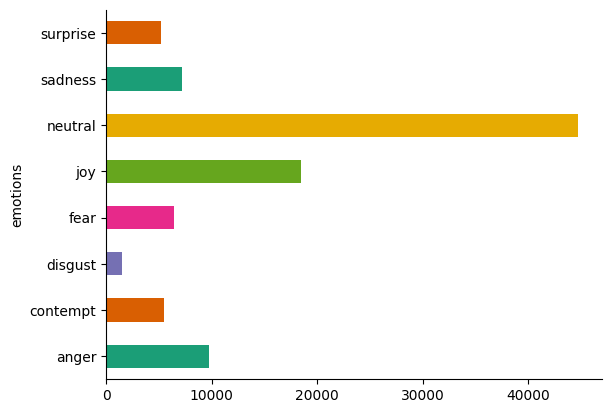

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotion_num']=df['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
df['triggers'].value_counts()

0            88707
1.0           4551
0.0           3526
1             1991
Curiosity        1
Annoyance        1
Name: triggers, dtype: int64

In [ ]:
df[df['triggers']=='Curiosity']

,utterances,triggers,emotions,emotion_num
14118,mummyji,Curiosity,joy,1


In [ ]:
df[df['triggers']=='Annoyance']

,utterances,triggers,emotions,emotion_num
29147,trivennum!,Annoyance,neutral,0


In [ ]:
df["triggers"].replace( '0','0.0', inplace=True)

In [ ]:
df["triggers"].replace( '1','1.0', inplace=True)

In [ ]:
df['triggers'].value_counts()

0.0          92233
1.0           6542
Curiosity        1
Annoyance        1
Name: triggers, dtype: int64

In [ ]:
df.loc[14118]

utterances       mummyji
triggers       Curiosity
emotions             joy
emotion_num            1
Name: 14118, dtype: object

In [ ]:
df=df.drop(index=[14118,29147])

In [ ]:
df['triggers'].value_counts()

0.0    92233
1.0     6542
Name: triggers, dtype: int64

In [ ]:
92233/6542

14.098593702231733

In [ ]:
df

,utterances,triggers,emotions,emotion_num
0,theek se wajan karana,0,neutral,0
1,monisha,0,neutral,0
2,"abhi ayi. yeh, ye bhi rakho.",0,anger,2
3,"monisha, iss churidaar me nara nhi hai.",1,neutral,0
4,to kisee aur churidaar ka nara nikalke dalo na...,0,neutral,0
...,...,...,...,...
98772,hmm.,0,neutral,0
98773,vo maine apani machali ko bhi khilaya tha.,1,sadness,3
98774,hmm?,0,neutral,0
98775,vo mar gaye.,1,sadness,3


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X = df[['utterances',
        'emotion_num']]
y = df['triggers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(class_weight={'1':14.098593702231733,'0':1})
vectorizer1 = TfidfVectorizer()
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'utterances')],
    remainder='passthrough')
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

ValueError: The classes, ['0.0', '1.0'], are not in class_weight

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.804150847886611
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     18453
           1       0.07      0.17      0.10      1302

    accuracy                           0.80     19755
   macro avg       0.51      0.51      0.50     19755
weighted avg       0.88      0.80      0.84     19755



In [ ]:
y_pred.astype('int').sum()

3017

In [ ]:
y_test.astype('int').sum()

1302

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X = df[['utterances',
        'emotion_num']]
y = df['triggers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(class_weight={'1.0':12,'0.0':1})
vectorizer1 = TfidfVectorizer()
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'utterances')],
    remainder='passthrough')
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classify__class_weight': [{'0': 1, '1': 20}, {'0': 1, '1': 7}, {'0': 1, '1':10}]
}
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf = grid_search.best_estimator_
print(best_score)

In [ ]:
best_params

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
y_pred.astype('int').sum()

In [ ]:
import pickle
with open('modelv0task2.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [ ]:
import pickle

with open('modelv0task2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
df_val=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task2val.csv")

In [ ]:
df_val

,Unnamed: 0,speakers,utterances,triggers,emotions
0,0,monisha,theek se wajan karana,0.0,neutral
1,1,sahil,monisha,0.0,neutral
2,2,monisha,"abhi ayi. yeh, ye bhi rakho.",0.0,anger
3,3,sahil,"monisha, iss churidaar me nara nhi hai.",0.0,neutral
4,4,monisha,to kisee aur churidaar ka nara nikalke dalo na...,0.0,neutral
...,...,...,...,...,...
7457,7457,monisha,"mummy ji, aaj me aapke yahan khana kha sakti h...",0.0,neutral
7458,7458,maya,oh well...,0.0,neutral
7459,7459,monisha,"wo kya hai na, mera banaya hua sambhar or tv k...",0.0,sadness
7460,7460,maya,kese,1.0,neutral


In [ ]:
df_val['emotion_num']=df_val['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
df_val['triggers'].value_counts()

0.0    7028
1.0     434
Name: triggers, dtype: int64

In [ ]:
# df_val["triggers"].replace(1.0, 1, inplace=True)

In [ ]:
# df_val["triggers"].replace(0.0, 0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X_train = df[['utterances',
        'emotion_num']]
y_train = df['triggers']
X_test = df_val[['utterances',
        'emotion_num']]
y_test = df_val['triggers']
model = RandomForestClassifier(class_weight={'1.0':12,'0.0':1})
vectorizer1 = TfidfVectorizer()
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'utterances')],
    remainder='passthrough')
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
y_train

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
98772    0.0
98773    1.0
98774    0.0
98775    1.0
98776    0.0
Name: triggers, Length: 98775, dtype: object

In [ ]:
y_test

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7457    0.0
7458    0.0
7459    0.0
7460    1.0
7461    0.0
Name: triggers, Length: 7462, dtype: float64

In [ ]:
import numpy as np

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/EDiReF-SemEval/Dataincsv/task2test.csv")

In [ ]:
df_test

,Unnamed: 0,speakers,utterances,emotions
0,0,monisha,theek se wajan karana,neutral
1,1,sahil,monisha,neutral
2,2,monisha,"abhi ayi. yeh, ye bhi rakho.",anger
3,3,monisha,theek se wajan karana,neutral
4,4,sahil,monisha,neutral
...,...,...,...,...
7685,7685,dushyant,ha baitho... ha so sahil...dhyan se suno..ross...,anger
7686,7686,rosesh,notes! shayad ismeise mujhe loi kahani mil jaa...,neutral
7687,7687,dushyant,blue pen se?,neutral
7688,7688,dushyant,dekho fir xerox nikaalne hogi to mujhe mat keh...,fear


In [ ]:
df_test['emotion_num']=df_test['emotions'].map({'neutral':0,'joy':1,'anger':2,'sadness':3,'contempt':4,'fear':5,'surprise':6,'disgust':7})

In [ ]:
y_test=df_test[['utterances','emotion_num']]

In [ ]:
y_pred=pipe.predict(y_test)

In [ ]:
y_pred

array(['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'], dtype=object)

TypeError: write() argument must be str, not numpy.ndarray

In [ ]:
import numpy as np

with open('answer.txt', 'w') as file:
    for value in y_pred:
        file.write(str(value) + '\n')